In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\bank-full (2).csv" , sep = ";")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.duplicated().any()

False

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
le = LabelEncoder()


In [8]:
data_encoded = data.apply(le.fit_transform)

In [9]:
data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [10]:
data.shape

(45211, 17)

In [11]:
x = data_encoded.drop(['y'] , axis = 1)
y = data_encoded['y']

In [12]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3


In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

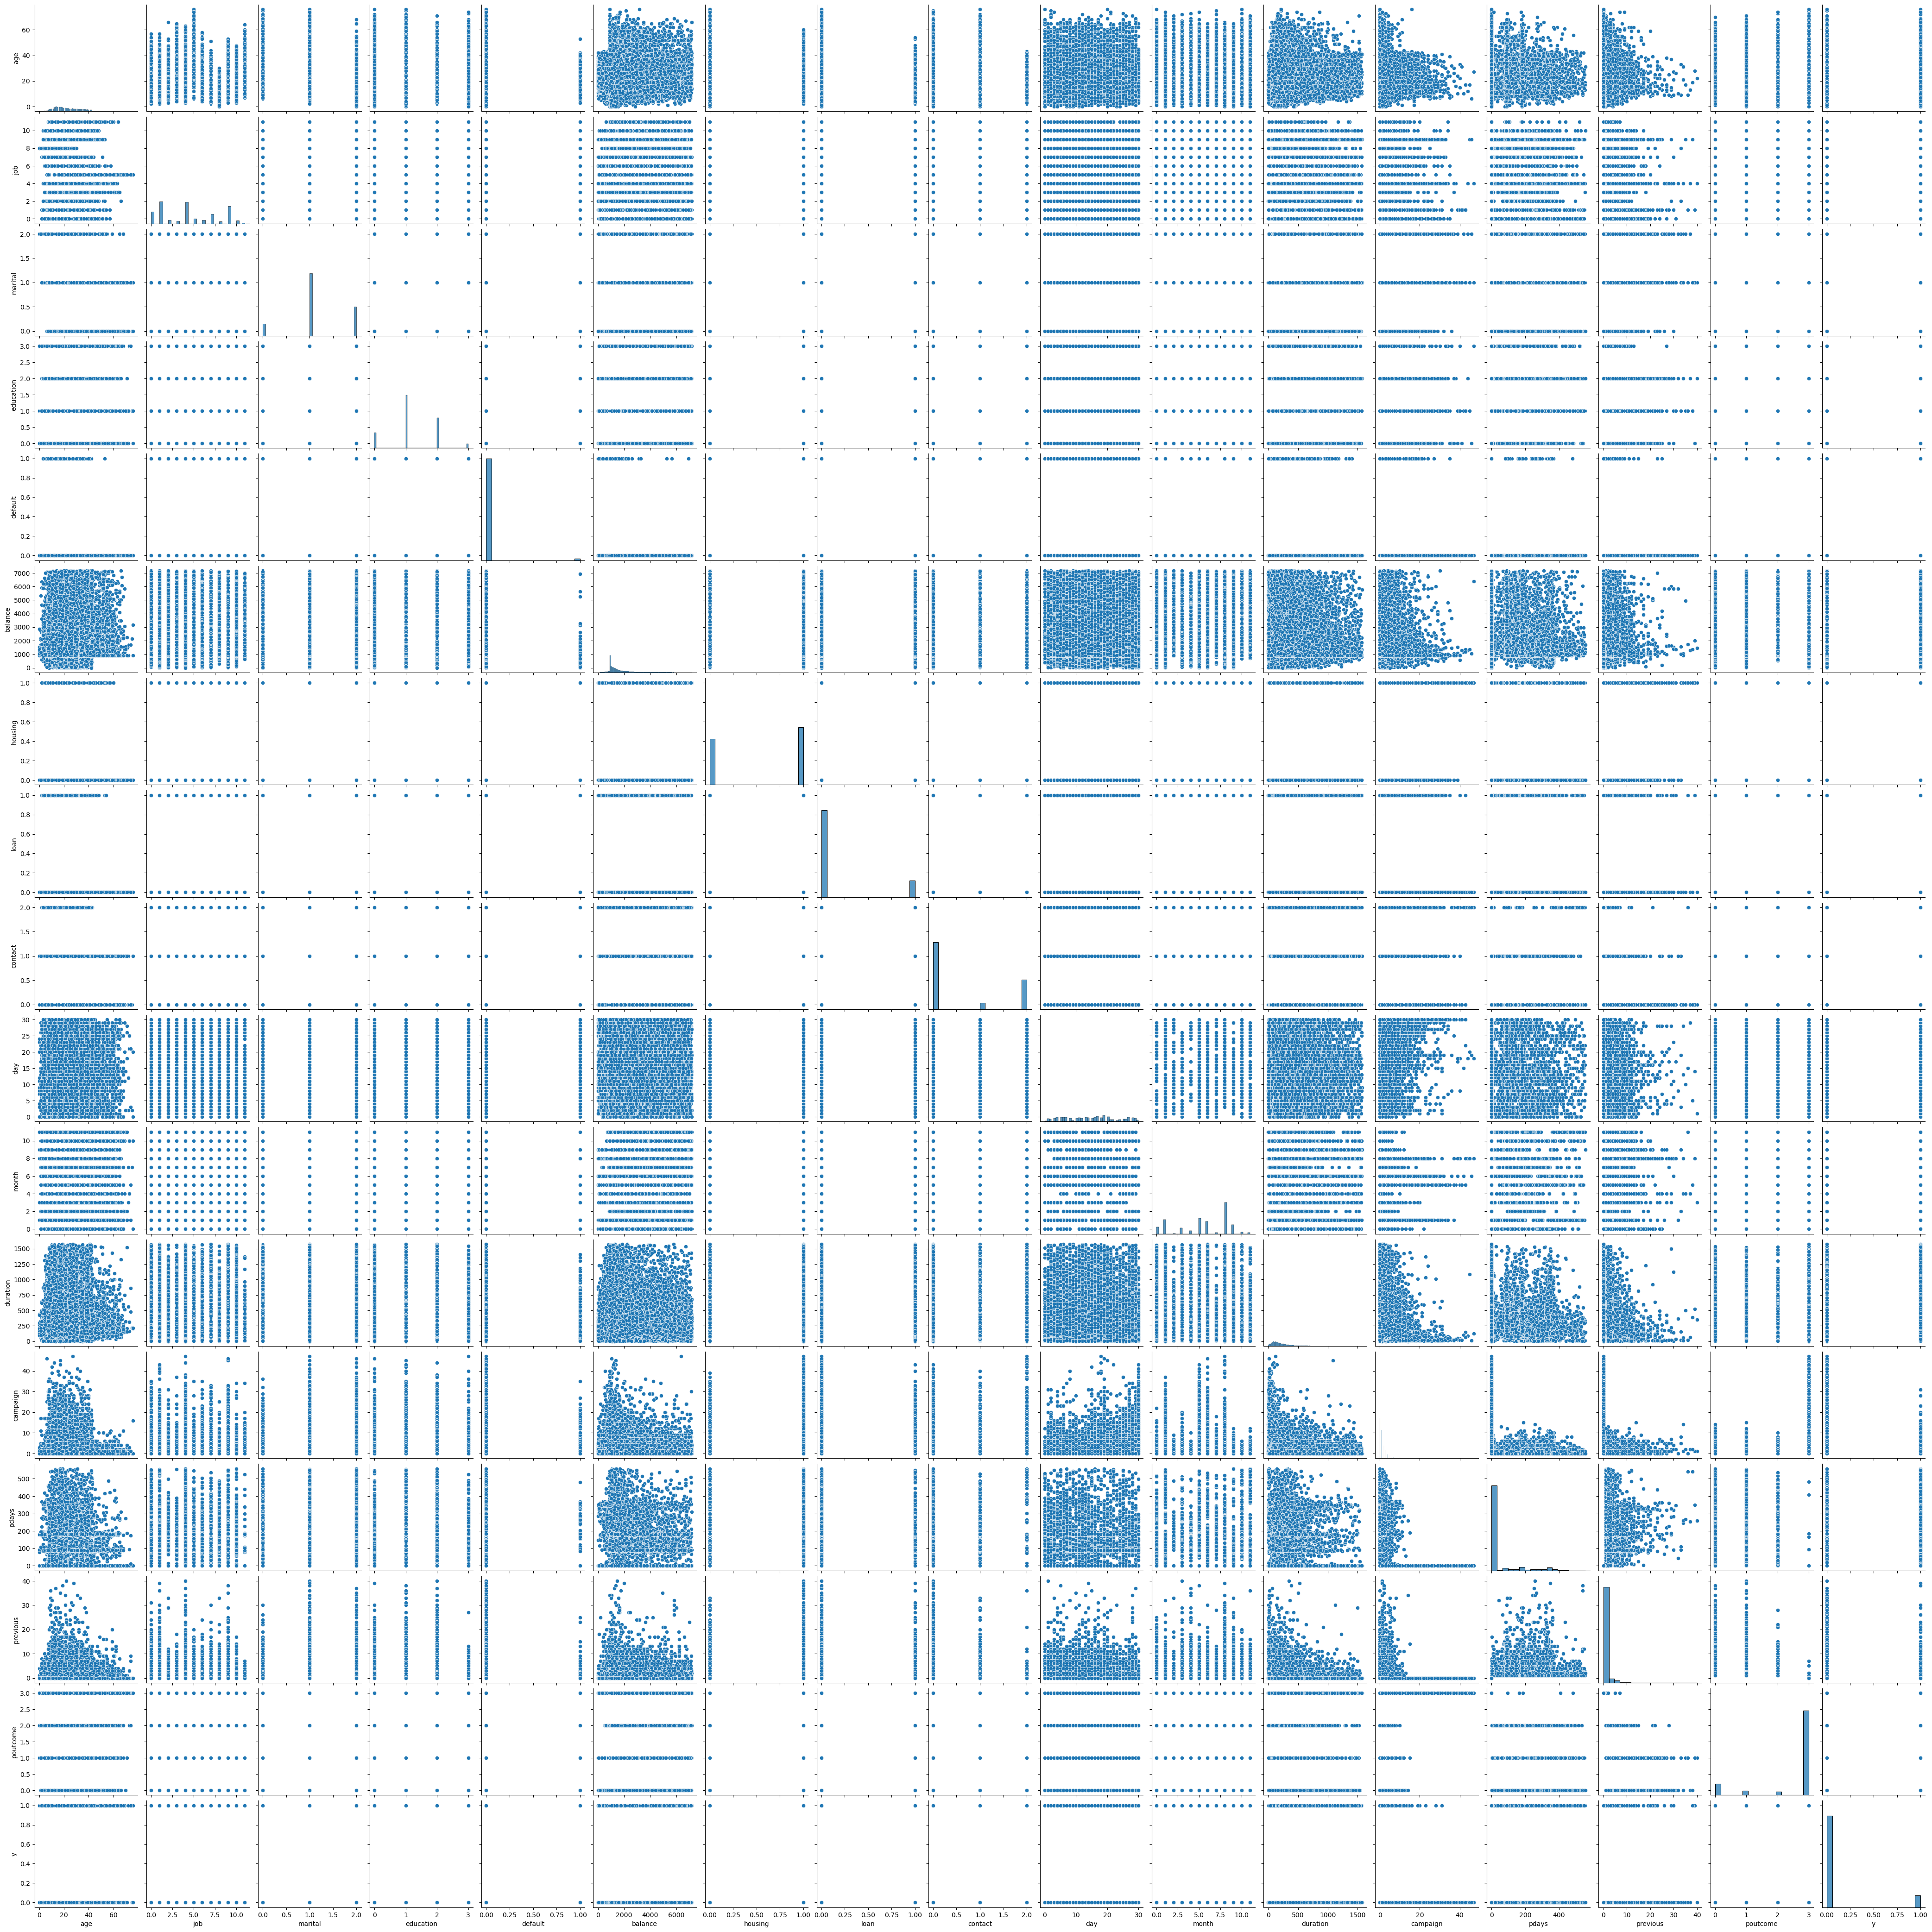

In [20]:
sn.pairplot(data_encoded)

In [28]:
## split the data on training and testing data sets

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [30]:
## apply the logistic regression model

model = LogisticRegression() 

In [31]:
model1 = model.fit(x_train , y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
model1

LogisticRegression()

In [33]:
y_pred = model1.predict(x_test)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
data_encoded.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0


<Axes: xlabel='age', ylabel='y'>

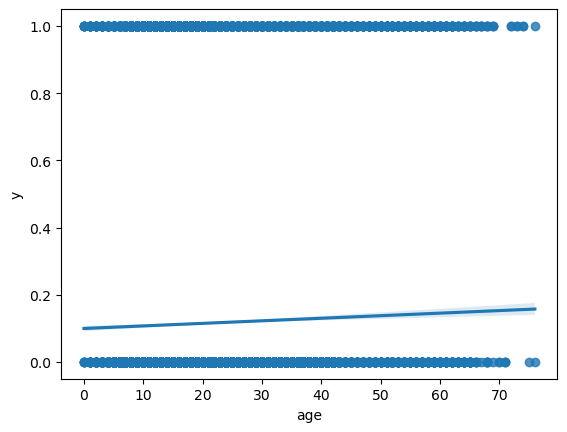

In [36]:
sn.regplot(x = 'age' , y = 'y'  , data = data_encoded)

C:\Users\user\AppData\Local\Temp\ipykernel_19164\3258471590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(y_pred)


<Axes: ylabel='Density'>

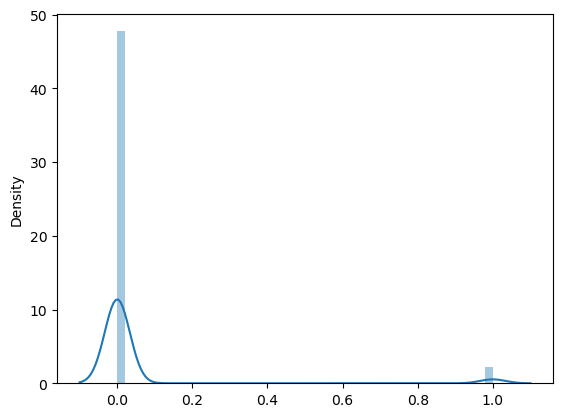

In [37]:
sn.distplot(y_pred)

In [91]:
confusion = confusion_matrix(y_pred , y_test)

In [93]:
confusion

array([[7760,  878],
       [ 192,  213]], dtype=int64)

In [88]:
classification = classification_report(y_pred , y_test)

In [90]:
print(classification)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8638
           1       0.20      0.53      0.28       405

    accuracy                           0.88      9043
   macro avg       0.59      0.71      0.61      9043
weighted avg       0.94      0.88      0.91      9043



In [94]:
accuracy = accuracy_score(y_pred , y_test)

In [95]:
accuracy

0.8816764348114564

In [100]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Text(0, 0.5, 'True Positive Rate')

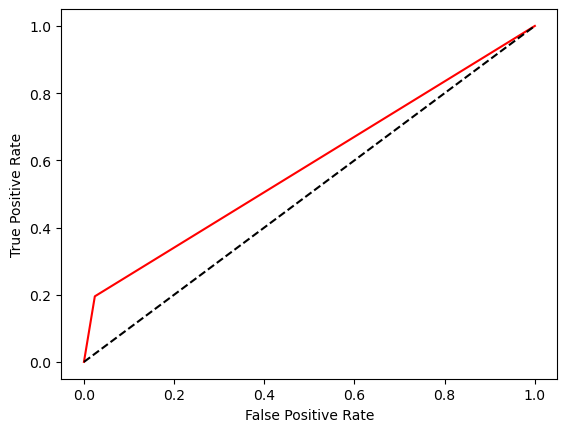

In [120]:
fpr , tpr, _ = roc_curve(y_test , y_pred)
auc = roc_auc_score(y_test , y_pred)
plt.plot(fpr , tpr , color = 'red' , label = 'ROC CURVE (AUC = %0.20f)' %auc )
plt.plot([0,1] , [0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')         

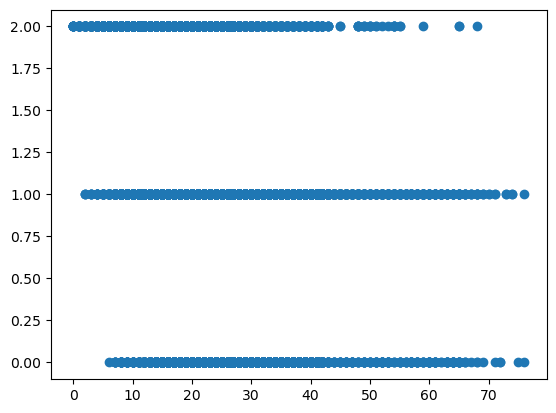

In [39]:
plt.scatter(x = 'age' , y = 'marital' , data = data_encoded)